Above all, we need graphviz package. You can also refer to graphviz [documentation](https://graphviz.readthedocs.io/en/stable/manual.html)

```bash
pip install -U graphviz
```

In [1]:
import torch
import torchvision

from yolort.utils.graph_utils import make_graph
from yolort.models import yolov5s

In [2]:
model = yolov5s(pretrained=True)
model = model.eval()

In [3]:
class Detection(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, inp):
        assert inp.shape[0] == 1
        res, = self.model(inp)
        return res['boxes'], res['labels'], res['scores']

In [4]:
tm = torch.jit.trace(Detection(model), [torch.randn(1, 3, 416, 320)], check_trace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  import sys
/usr/local/lib/python3.6/dist-packages/torch/tensor.py:593: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
/data/wangzq/yolov5-rt-stack/yolort/models/anchor_utils.py:31: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case

In [5]:
dot_highlevel = make_graph(tm.model, classes_to_visit={'YOLO', 'YOLOHead'})

In [6]:
dot_highlevel.attr(rank='max', size='7,8')

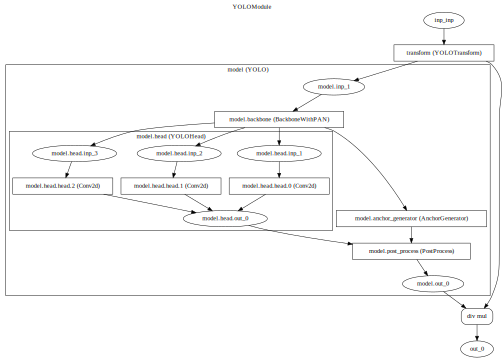

In [7]:
dot_highlevel